In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Importando os csv do outro arquivo com os dados ja processados

In [120]:
x_train, x_test, y_train, y_test = pd.read_pickle('sample_data/titanic_data_ready.pkl')
x_test_csv = pd.read_pickle('sample_data/titanic_data_test_ready.pkl')

In [121]:
x_train, x_test

(     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 445       1    0   4.0      0      2   81.8583         0
 650       3    0  28.0      0      0    7.8958         0
 172       3    1   1.0      1      1   11.1333         0
 450       2    0  36.0      1      2   27.7500         0
 314       2    0  43.0      1      1   26.2500         0
 ..      ...  ...   ...    ...    ...       ...       ...
 106       3    1  21.0      0      0    7.6500         0
 270       1    0  28.0      0      0   31.0000         0
 860       3    0  41.0      2      0   14.1083         0
 435       1    1  14.0      1      2  120.0000         0
 102       1    0  21.0      0      1   77.2875         0
 
 [623 rows x 7 columns],
      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 709       3    0  28.0      1      1  15.2458         1
 439       2    0  31.0      0      0  10.5000         0
 840       3    0  20.0      0      0   7.9250         0
 720       2    1   6.0      0      1  33.0000   

In [122]:
x_test_csv

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,27.0,0,0,8.0500,0




---



#  


---



# Preparando RandomizedSearchCV

In [123]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#  


---



# 1- Treinando Modelos e testando o csv para cada **modelo**

## Naive

In [124]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [152]:
naive = GaussianNB()

random_search = RandomizedSearchCV(
    naive,               # O modelo
    param_distributions=param_dist,  # O espaço de hiperparâmetros
    n_iter=10,         # Número de combinações aleatórias a serem testadas
    scoring='accuracy',  # Métrica de avaliação
    cv=5,              # Número de folds de validação cruzada
    random_state=42,   # Semente para reprodutibilidade
    verbose=2,         # Para exibir o progresso
    n_jobs=-1          # Usar todos os núcleos disponíveis para acelerar a busca
)


random_search.fit(x_train, y_train)
naive_model = random_search_N.best_estimator_

y_naive_pred = naive_model.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


### Teste do csv

In [153]:
test_prediction_naive = naive_model.predict(x_test_csv)

## Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
param_dist = {
    'n_estimators': np.arange(10, 200, 10),        # Número de árvores
    'max_depth': np.arange(1, 20),                 # Profundidade máxima
    'min_samples_split': np.arange(2, 10),         # Mínimo de amostras para dividir um nó
    'min_samples_leaf': np.arange(1, 10),          # Mínimo de amostras em uma folha
    'bootstrap': [True, False]                     # Amostragem com ou sem reposição
}

In [158]:
random_forest = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    random_forest,              # O modelo
    param_distributions=param_dist,  # O espaço de hiperparâmetros
    n_iter=50,       # Número de combinações aleatórias a serem testadas
    scoring='accuracy',  # Métrica de avaliação (pode ser alterada para outra métrica, como 'f1' ou 'roc_auc')
    cv=5,            # Número de folds de validação cruzada
    random_state=42, # Semente para reprodutibilidade
    verbose=2,       # Para exibir o progresso
    n_jobs=-1        # Usar todos os núcleos disponíveis para acelerar a busca
)

random_search.fit(x_train, y_train)
random_forest_model = random_search.best_estimator_

y_random_forest_pred = random_forest_model.predict(x_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


### Teste do csv

In [159]:
test_prediction_random_forest = random_forest_model.predict(x_test_csv)

## Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
param_dist = {
    'criterion': ['gini', 'entropy'],  # Função de avaliação
    'max_depth': [None] + list(np.arange(1, 21)),  # Profundidade máxima
    'min_samples_split': np.arange(2, 11),  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': np.arange(1, 11),  # Mínimo de amostras em uma folha
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características
}

In [162]:
tree = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    tree,                               # O modelo
    param_distributions=param_dist,     # O espaço de hiperparâmetros
    n_iter=50,                          # Número de combinações aleatórias a serem testadas
    scoring='accuracy',                 # Métrica de avaliação
    cv=5,                               # Número de folds de validação cruzada
    random_state=42,                    # Semente para reprodutibilidade
    verbose=2,                          # Para exibir o progresso
    n_jobs=-1                           # Usar todos os núcleos disponíveis
)

random_search.fit(x_train, y_train)

tree_model = random_search.best_estimator_

y_tree_pred = tree_model.predict(x_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

### Teste do csv

In [163]:
test_prediction_tree = tree_model.predict(x_test_csv)

#  


---



# 2- Matriz de confusão e precisão e recall

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Random Forest

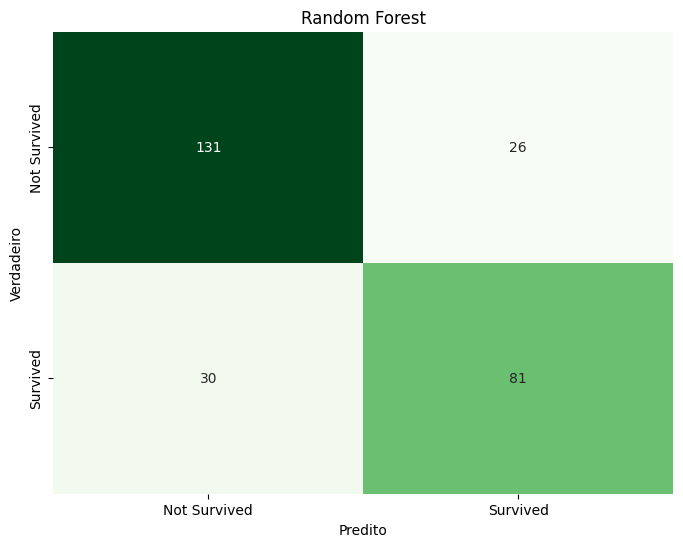

In [134]:
cmR = confusion_matrix(y_test, y_random_forest_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmR, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Random Forest')
plt.show()

In [135]:
print(classification_report(y_test, y_random_forest_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.76      0.73      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### Naive

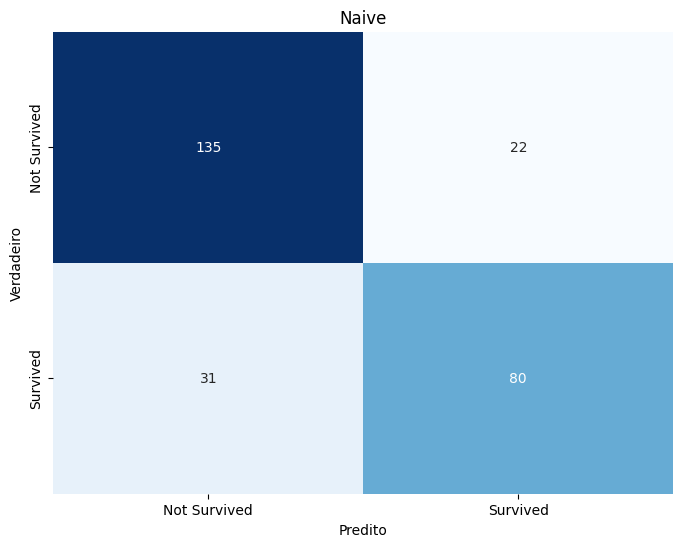

In [136]:
cmN = confusion_matrix(y_test, y_naive_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmN, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Naive')
plt.show()

In [137]:
print(classification_report(y_test, y_naive_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### Tree

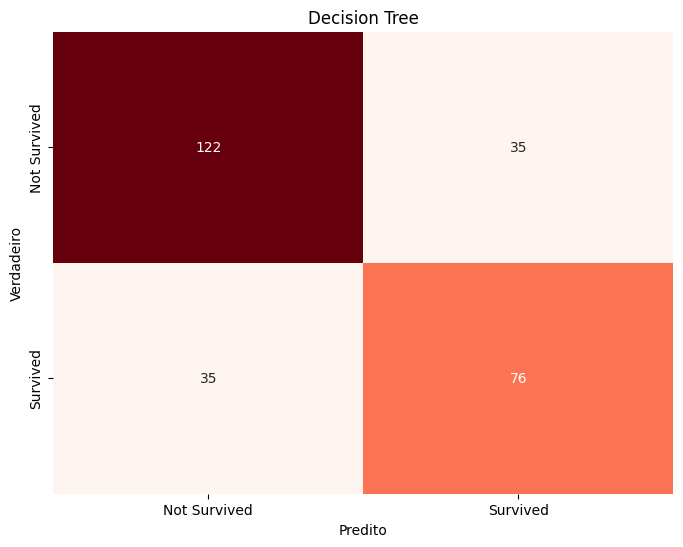

In [138]:
cmT = confusion_matrix(y_test, y_tree_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmT, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Decision Tree')
plt.show()

In [139]:
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.68      0.68      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



---


#  


---



# 3- Comparação da acuracia de cada modelo pelo treino

In [172]:
from sklearn.metrics import accuracy_score

### Calculando a acurancia de cada modelo

In [173]:
accuracy_rf = accuracy_score(y_test, y_random_forest_pred)
accuracy_naive = accuracy_score(y_test, y_naive_pred)
accuracy_tree = accuracy_score(y_test, y_tree_pred)

In [174]:
accuracies = [accuracy_rf, accuracy_naive, accuracy_tree]
model_names = ['Random Forest', 'Naive Bayes', 'Árvore de Decisão']

### Criando gráfico de baras

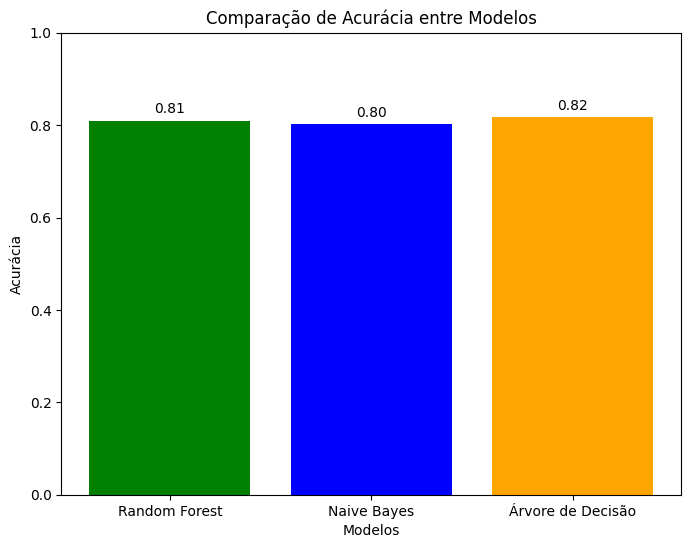

In [175]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange'])

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])  # Definir limites do eixo y para facilitar a leitura
plt.show()

#  


---



# 4- Testando a acuracia de cada modelo para o csv de teste

In [176]:
result = pd.read_csv('sample_data/gender_submission.csv')
result = result['Survived']

## Confirindo tamanho do resultados dos modelos em relação aos modelos

In [177]:
result.shape

(418,)

In [178]:
test_prediction_random_forest.shape

(418,)

In [179]:
test_prediction_naive.shape

(418,)

In [180]:
test_prediction_tree.shape

(418,)

## Acurancia dos testes do arquivo csv

In [181]:
accuracy_rf_csv = accuracy_score(result, test_prediction_random_forest)
accuracy_naive_csv = accuracy_score(result, test_prediction_naive)
accuracy_tree_csv = accuracy_score(result, test_prediction_tree)

In [182]:
accuracies_csv = [accuracy_rf_csv, accuracy_naive_csv, accuracy_tree_csv]
model_names = ['Random Forest', 'Naive Bayes', 'Árvore de Decisão']

## Montando o grafico das acuracias

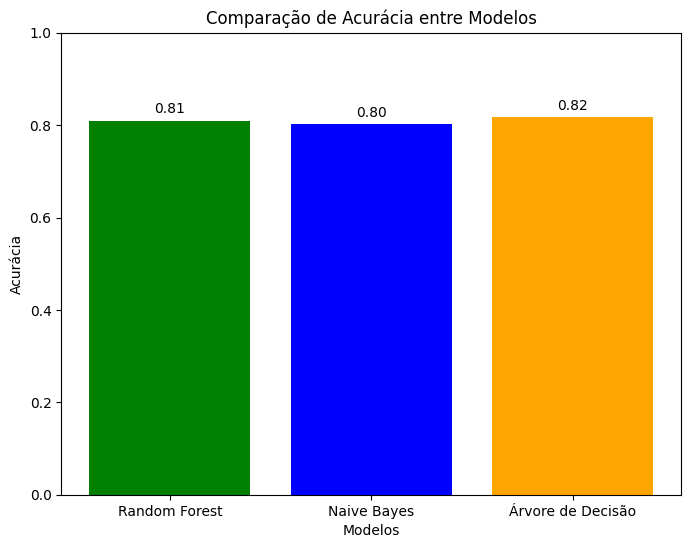

In [183]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange'])

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])  # Definir limites do eixo y para facilitar a leitura
plt.show()

---


#  


---

